## Imports

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.special
    
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

## Utils

In [60]:
def load_benchmark(path):
    return pd.read_csv(path, delimiter='\t')

def plot_benchmark(benchmark_list, labels, colors, image_name, display_legend = True):
    plt.figure(figsize=(12, 10))
    
    for i in range(len(benchmark_list)):
        plt.plot(benchmark_list[i]['param-size'], benchmark_list[i]['value'], label=labels[i], color=colors[i])

    plt.ylabel('ms')
    plt.xlabel('size')
    if display_legend:
        plt.legend(loc=0)
    plt.savefig('images/' + image_name + '.png', bbox_inches='tight')
    

## Search

In [46]:
list_linear_search_df = load_benchmark('data/Search.listSearch.Test-0.dsv')
array_linear_search_df = load_benchmark('data/Search.arraySearch.Test-1.dsv')
binary_search_df = load_benchmark('data/Search.binarySearch.Test-2.dsv')

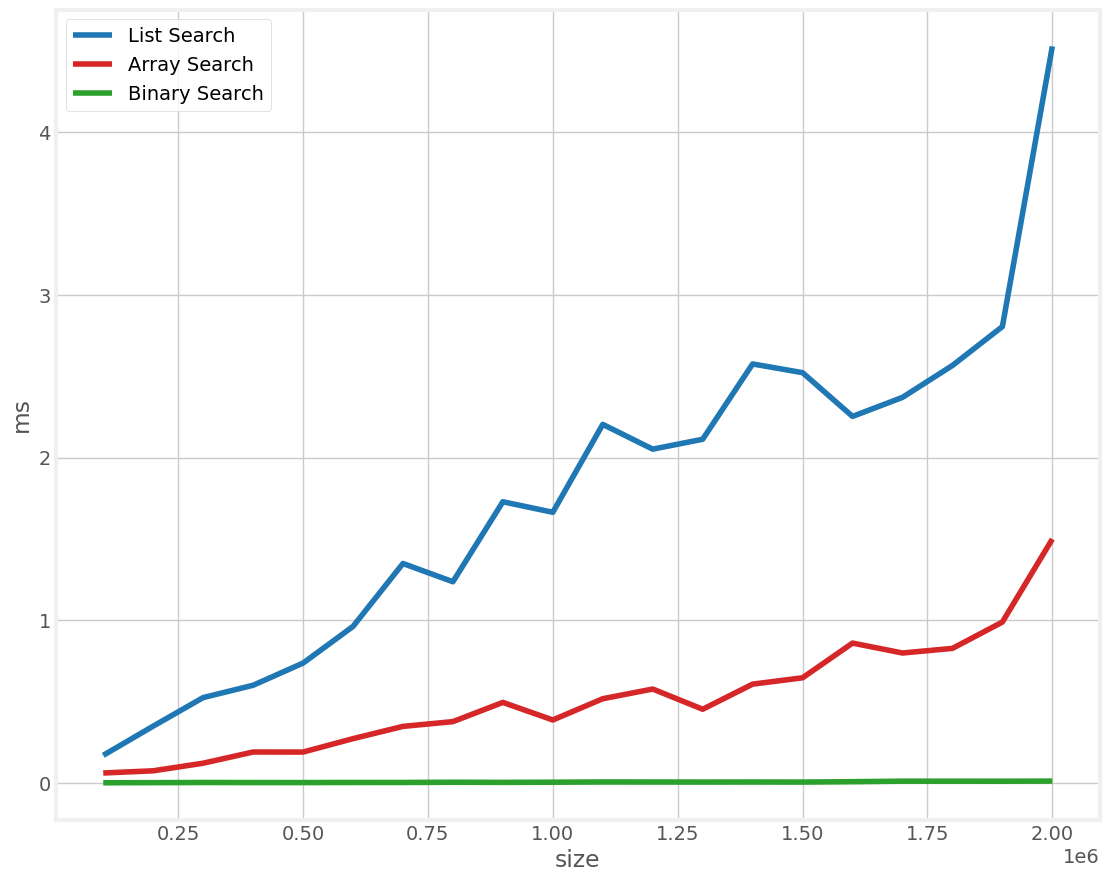

In [61]:
plot_benchmark([list_linear_search_df, array_linear_search_df, binary_search_df],\
               ['List Search', 'Array Search', 'Binary Search'],\
               ['tab:blue', 'tab:red', 'tab:green'], 'search')

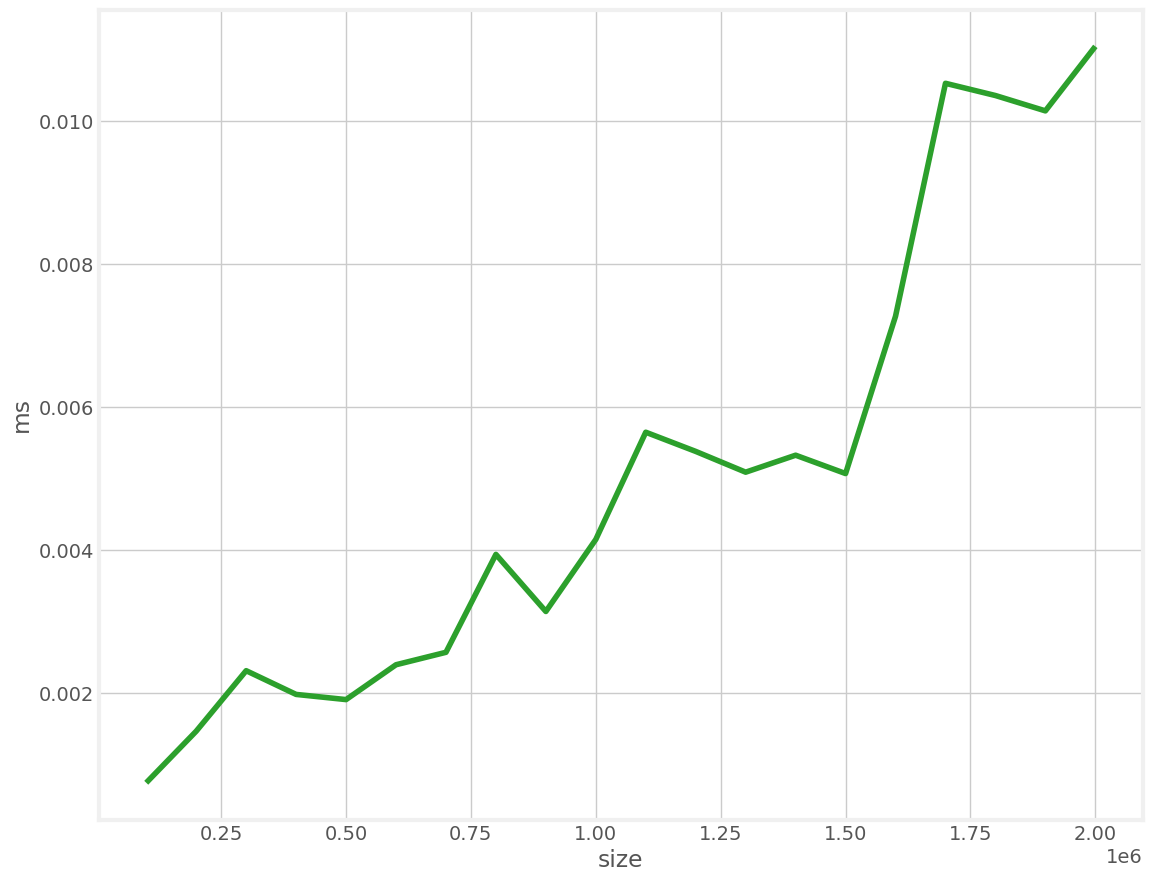

In [63]:
plot_benchmark([binary_search_df], ['Binary Search'], ['tab:green'],'binary-search', False)

## Sort

In [74]:
quicksort_df = load_benchmark('data/Sort.quickSort.Test-0.dsv')
sorted_quicksort_df = load_benchmark('data/Sort.sortedQuickSort.Test-1.dsv')
copy_array_df = load_benchmark('data/Sort.copyArray.Test-2.dsv')

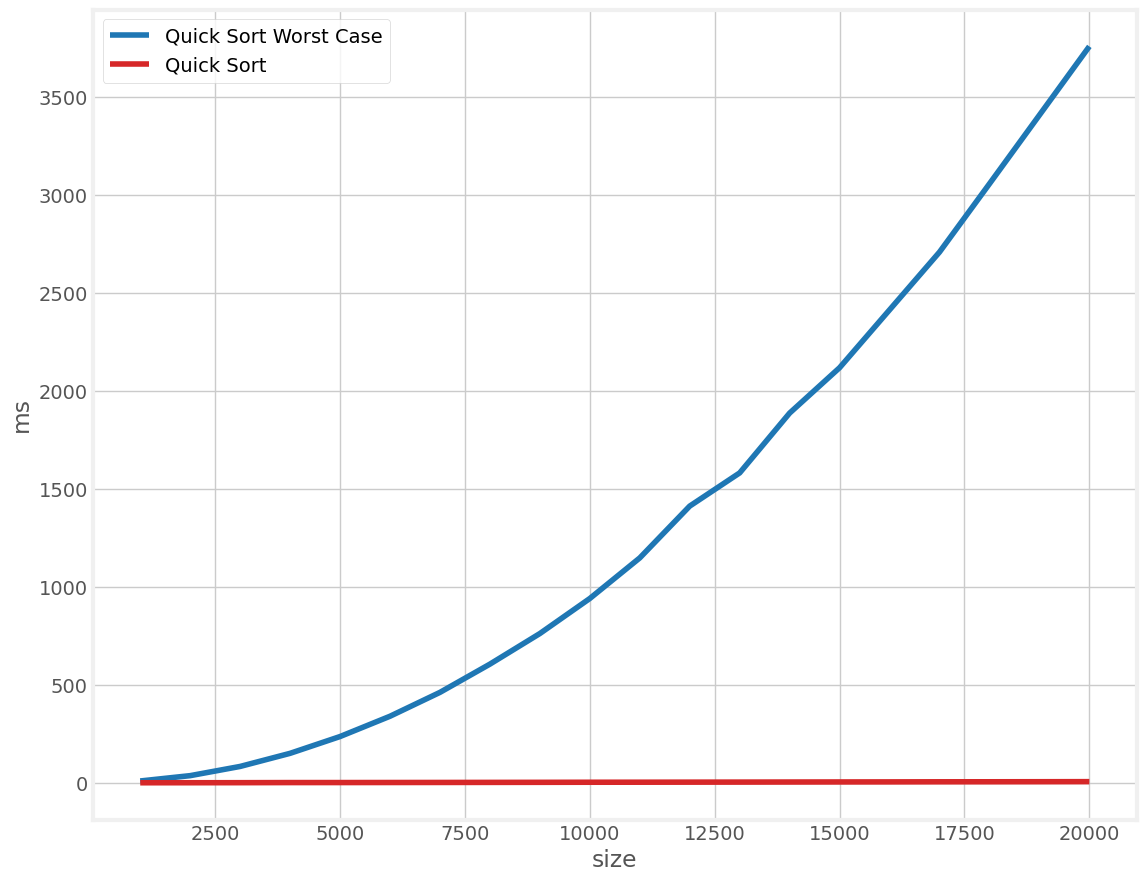

In [79]:
plot_benchmark([sorted_quicksort_df, quicksort_df],\
               ['Quick Sort Worst Case', 'Quick Sort'],\
               ['tab:blue', 'tab:red'], 'quicksort-worstcase')

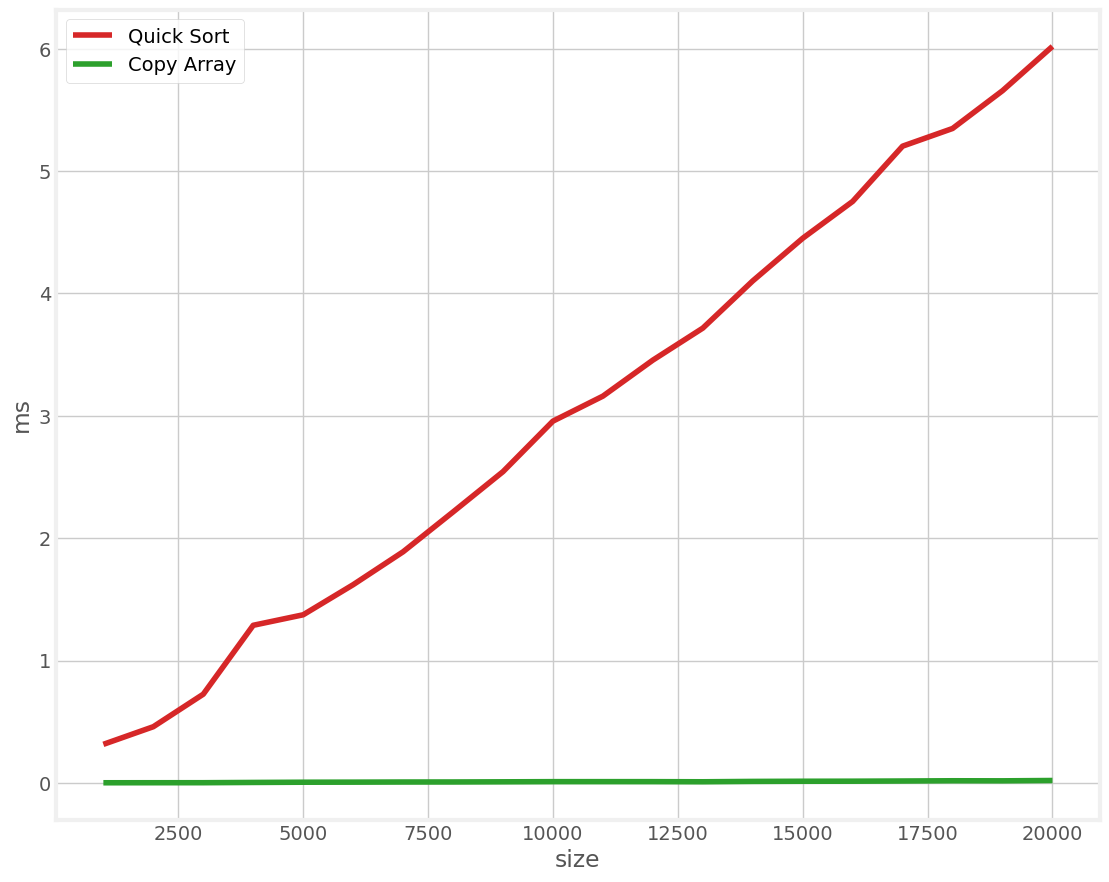

In [80]:
plot_benchmark([quicksort_df, copy_array_df],\
               ['Quick Sort', 'Copy Array'],\
               ['tab:red', 'tab:green'], 'quicksort-vs-copy-array')

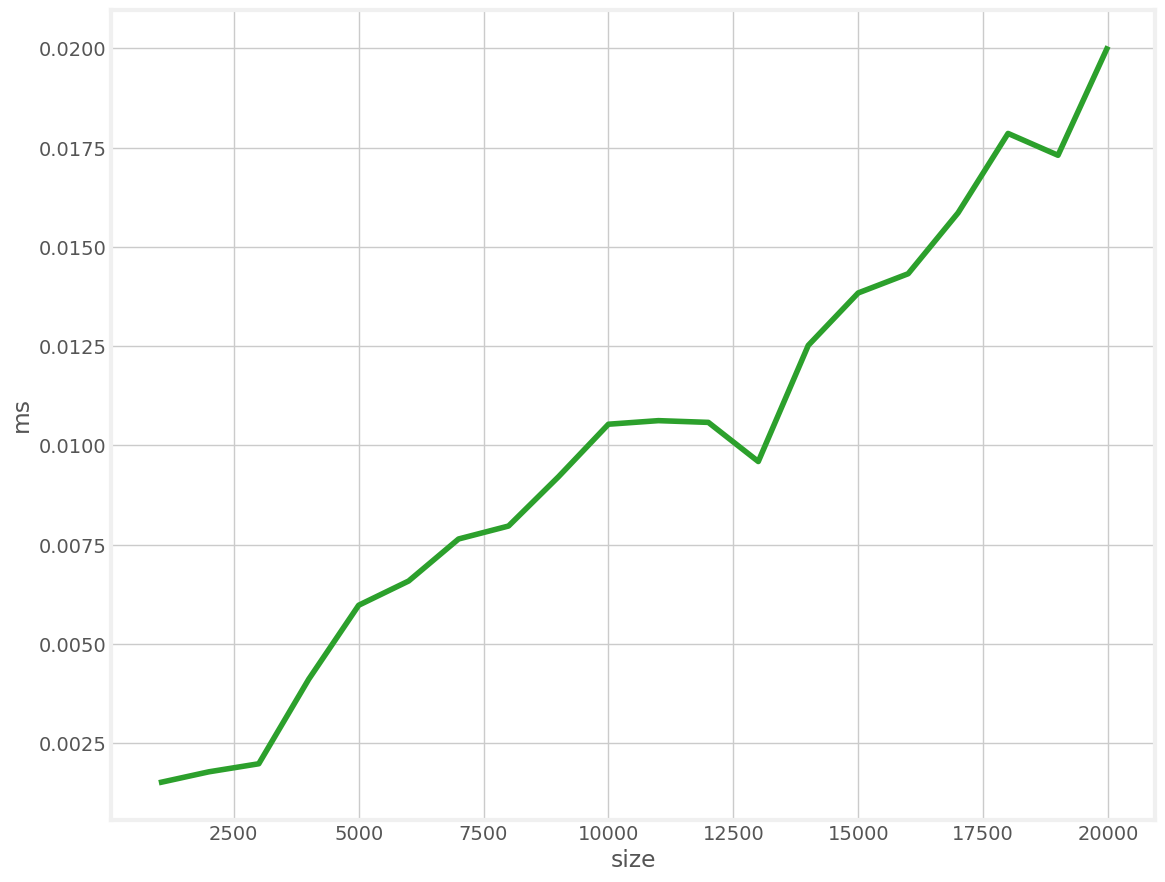

In [77]:
plot_benchmark([copy_array_df],\
               ['Copy Array'],\
               ['tab:green'], 'copy-array', False)

In [81]:
small_quicksort_df = load_benchmark('data/Sort.quickSort.Test-3.dsv')
small_insertion_sort_df = load_benchmark('data/Sort.insertionSort.Test-4.dsv')

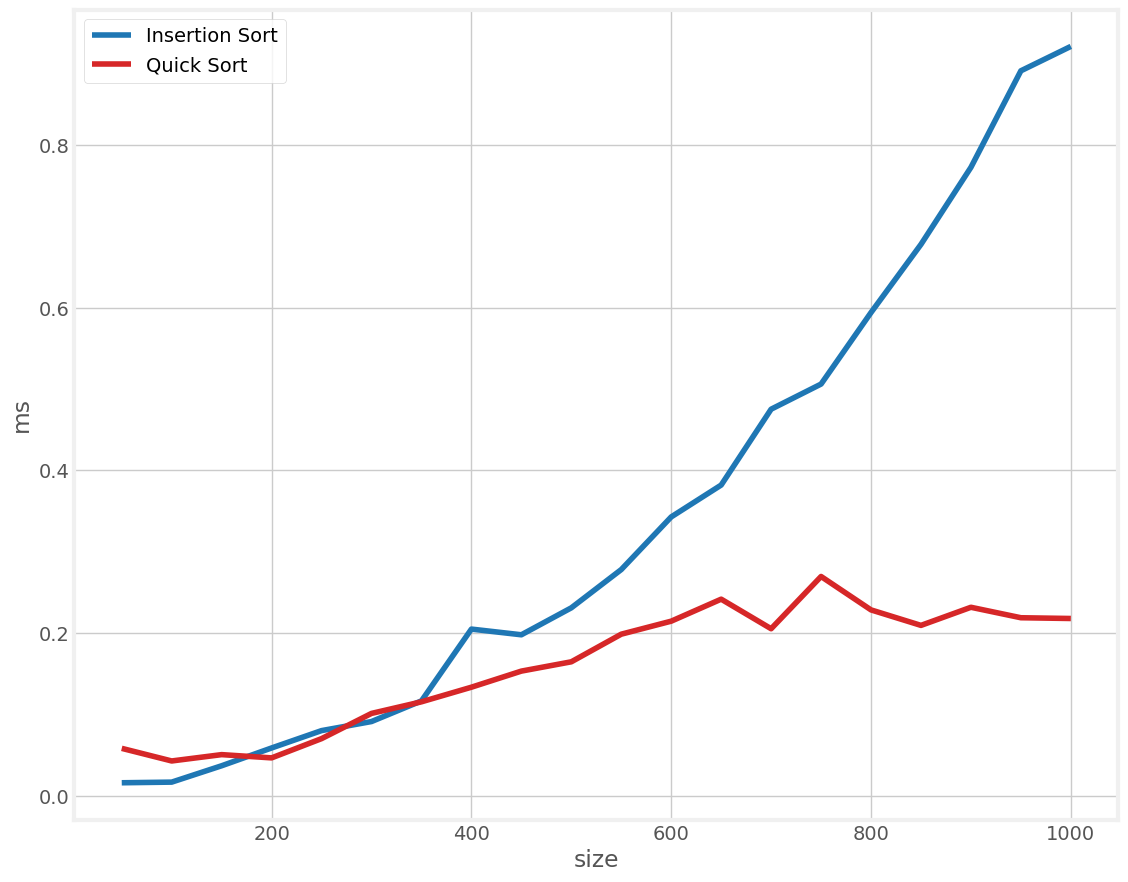

In [84]:
plot_benchmark([small_insertion_sort_df, small_quicksort_df],\
               ['Insertion Sort', 'Quick Sort'],\
               ['tab:blue', 'tab:red'], 'small-quicksort-vs-insertion-sort')

## Complexities

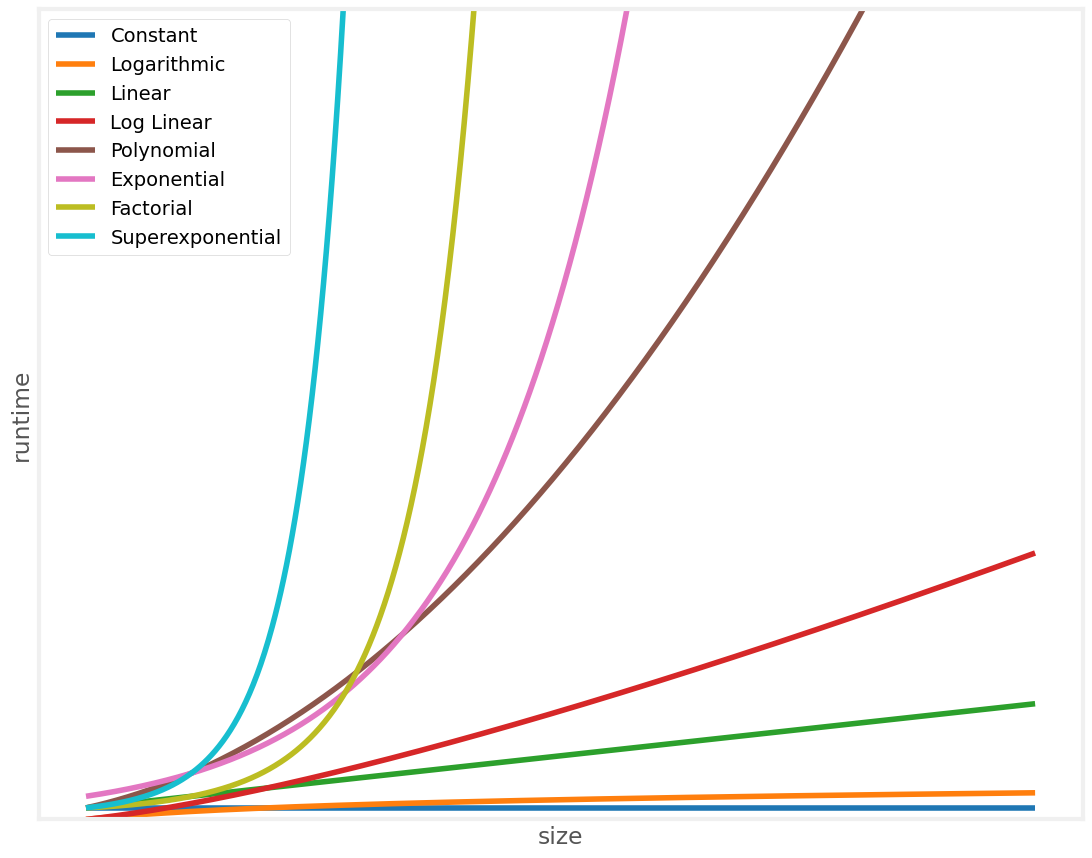

In [110]:
# Set up runtime comparisons
n = np.linspace(1, 10, 1000)
labels = ['Constant', 'Logarithmic', 'Linear', 'Log Linear', 'Polynomial', 'Exponential', 'Factorial', "Superexponential"]
big_o = [np.ones(n.shape), np.log(n), n, n * np.log(n), n**2, 2**n, scipy.special.factorial(n), n**n]
colors =['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']

# Plot setup
plt.figure(figsize=(12, 10))
plt.ylim(0, 70)


for i in range(len(big_o)):
    plt.plot(n, big_o[i], label=labels[i], color=colors[i])

plt.legend(loc=0)
plt.ylabel('runtime')
plt.xlabel('size')
plt.xticks([])
plt.yticks([])
plt.savefig('images/big-o-notation.png', bbox_inches='tight')